### 这个是用的对称互补相加

In [12]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
# 读取两个输入图像
image1 = cv2.imread(r'transformed222to2.png')
image2 = cv2.imread(r'origin_images\2.png')
mask1 = cv2.imread('mask222to2.png')
mask2 = cv2.imread('mask2.png')

In [14]:
overlap = mask1 & mask2  
if overlap.any():
    print('两张图像有重叠区域')
else:
    print('两张图像无重叠区域')

两张图像无重叠区域


In [15]:
def overlay_mask(image1, image2):
    # 在这里进行图像叠加，可以是简单的像素级叠加
    blended_image = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)
    return blended_image

mask = overlay_mask(mask1,mask2)
pillow_image_mask = Image.fromarray(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
pillow_image_mask.show()

In [16]:
def blend_with_mask(image1, image2, mask1, mask2):
    # 初始化与image1大小相同的全0数组
    masked_image1 = np.zeros_like(image1)
    # mask1==0的位置保留image1值
    masked_image1[mask1 == 0] = image1[mask1 == 0]
    # 初始化与image2大小相同的全0数组
    masked_image2 = np.zeros_like(image2)
    # mask2==0的位置保留image2值
    masked_image2[mask2 == 0] = image2[mask2 == 0]
    
    mask = overlay_mask(mask1,mask2)
    
    blended_image = np.zeros_like(image1)
    blended_image = cv2.addWeighted(masked_image1, 0.5, masked_image2, 0.5, 0)
    
    enhanced = blended_image
    enhanced[mask != 0] *= 2 # 将mask区域像素值放大一倍
    enhanced[mask != 0] = np.clip(enhanced[mask != 0], 0, 255) # 截断像素值范围(防止二倍后超上界)
    return enhanced

In [17]:
result = blend_with_mask(image1, image2, mask1, mask2)
pillow_image = Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
pillow_image.show()

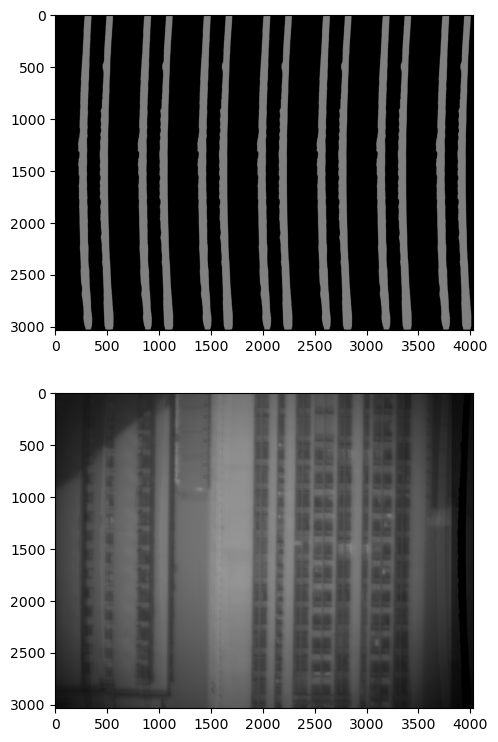

In [18]:
fig = plt.figure(figsize=(12,9))
plt.subplot(211)
plt.imshow(mask, cmap='gray')
plt.subplot(212)
plt.imshow(pillow_image, cmap="gray")


In [19]:
pillow_image.save("without222to2.png")